<a href="https://colab.research.google.com/github/seismomat/Numerico2025_1/blob/main/Cholesky_MinimosCuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_data(N=20):
  x=np.linspace(0,2,N)
  eps=1E-1;y=[]
  for i in range(N):
    y.append(2*x[i]+3+((-1)**i*eps))

  y=np.array(y)

  return x,y

In [3]:
def SustDelante(L,b):
    x=np.zeros_like(b)
    n=L.shape[0]# cantidad de renglones de L
    for i in range(n):
        sum=0.0
        for j in range(i):
            sum+=L[i,j]*x[j]
        x[i]=(b[i]-sum)/L[i,i]

    return x


def SustAtras(U, y):
    x = np.zeros_like(y)
    n = U.shape[0]  # cantidad de renglones de U
    x[n-1] = y[n-1] / U[n-1, n-1]
    for i in range(n-2, -1, -1):
        sum = 0.0
        for j in range(i+1, n):
            sum += U[i, j] * x[j]
        x[i] = (y[i] - sum) / U[i, i]

    return x

In [4]:
def Cholesky(A):


In [5]:
def EcNormal():
    x,y = get_data(30)
    A=np.zeros((len(x),2))
    A[:,0]=1.0
    A[:,1]=x
    b=y

    AtA=A.T@A
    Atb=A.T@b

    L=Cholesky(AtA)
    Lt=L.T

    ySol = SustDelante(L, Atb)
    Params = SustAtras(Lt, ySol)
    z=Params[0]+Params[1]*x

    plt.plot(x,y,'ro')
    plt.plot(x,z,'black')
    plt.show()

    return x

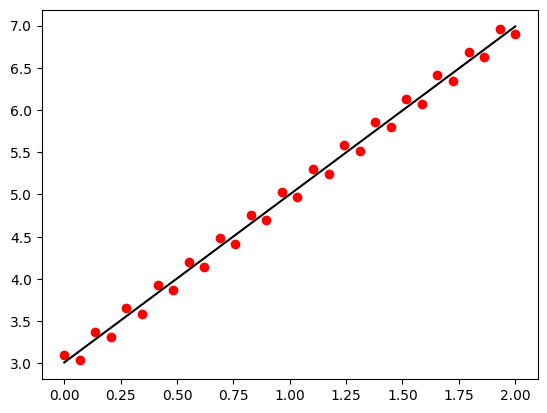

In [6]:
x=EcNormal()